## Visualizing Stress Data (Demo)
Here are some pre-built methods to plot stress stream data


## Import packages

In [2]:
from util.dependencies import *

## Create CerebralCortex object

In [3]:
CC = Kernel("/home/md2k/cc_conf/")

In [4]:
streams = CC.list_streams()

names = []
for stream in streams:
    names.append(stream.name)


    
stream_names_drpdwn = widgets.Dropdown(
    options=names,
    value=names[0],
    description='Stream Names:',
)
op = widgets.HTML(
    value="Hello <b>World</b>"
)
display(stream_names_drpdwn)
display(op)
output = widgets.Output()

@output.capture()
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        #print(change["new"])
        op.value = change["new"]
stream_names_drpdwn.observe(on_change)
display(output)    

Dropdown(description='Stream Names:', options=('ACCELEROMETER--org.md2k.cerebralcortex.test', 'accelerometer--…

HTML(value='Hello <b>World</b>')

Output()

## Generate some sample stress data

In [4]:
stream_name="STRESS-STREAM"
user_id = "00000000-afb8-476e-9872-6472b4e66b68"
data = gen_stress_data(True) # gen_phone_battery_data(user_id=user_id)
metadata = gen_phone_battery_metadata(stream_name=stream_name)
ds = DataStream(data, metadata)

NameError: name 'gen_phone_battery_metadata' is not defined

## Show sample stress data

In [4]:
ds.show(3)

+--------------------+-------------------+-------------------+-------------------+-------+--------+-------------+-----------------+----------+
|             user_id|          timestamp|         start_time|           end_time|density|location|stresser_main|     stresser_sub|  activity|
+--------------------+-------------------+-------------------+-------------------+-------+--------+-------------+-----------------+----------+
|a1112de1-ca36-42f...|2019-01-09 18:34:59|2019-01-09 18:34:59|2019-01-09 18:36:59|    0.9|    work|      Finance|Unexpected losses|   WALKING|
|a1112de1-ca36-42f...|2019-01-09 22:34:59|2019-01-09 22:34:59|2019-01-09 22:37:59|   0.28|    road|       Health| My eating habits|IN_VEHICLE|
|a1112de1-ca36-42f...|2019-01-09 23:34:59|2019-01-09 23:34:59|2019-01-09 23:50:59|    0.6|    road|      Driving| Saw a police car|IN_VEHICLE|
+--------------------+-------------------+-------------------+-------------------+-------+--------+-------------+-----------------+----------+

## Plot stress data

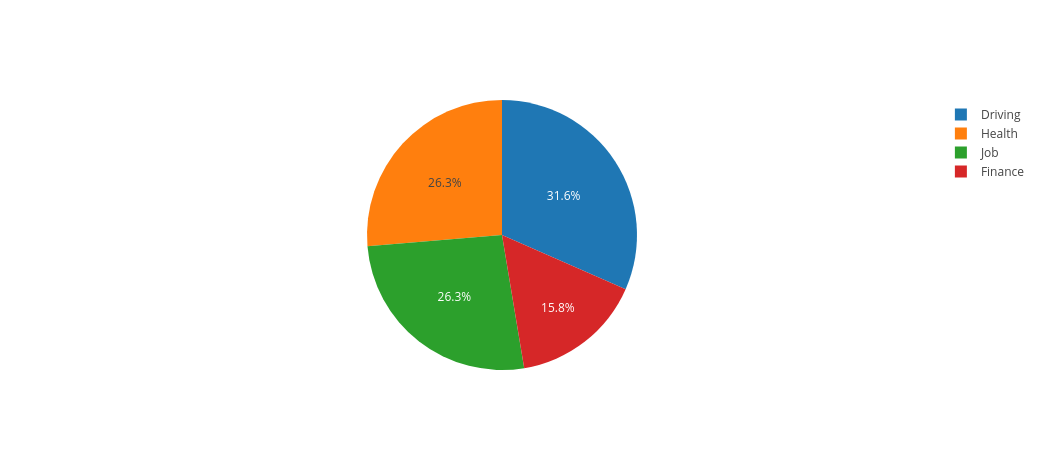

In [5]:
ds.plot_stress_pie()

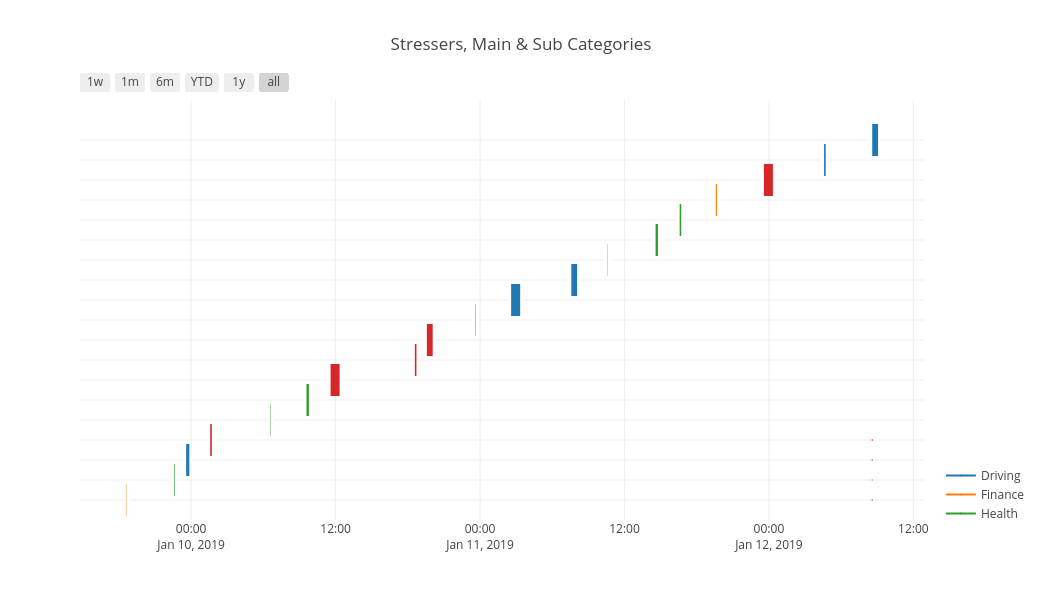

In [6]:
ds.plot_stress_gantt()

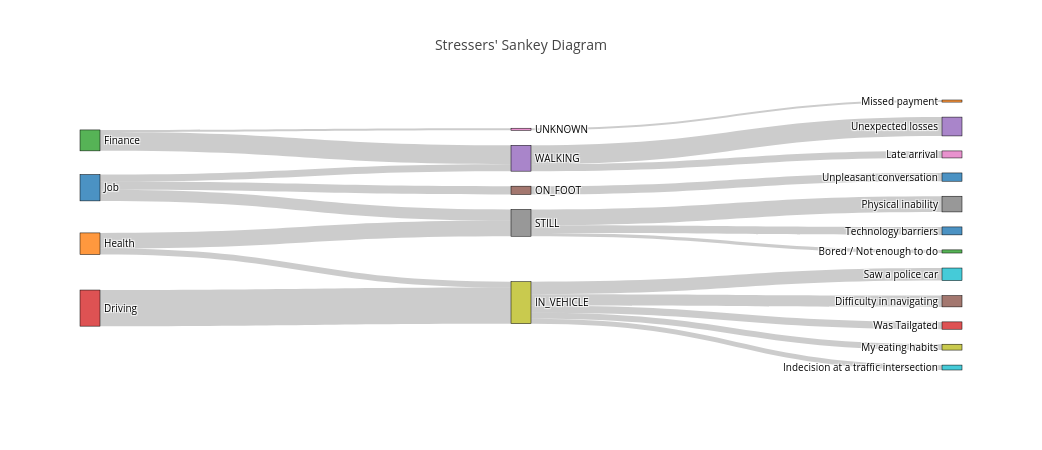

In [8]:
ds.plot_stress_sankey(cat_cols=["stresser_main","activity","stresser_sub"])

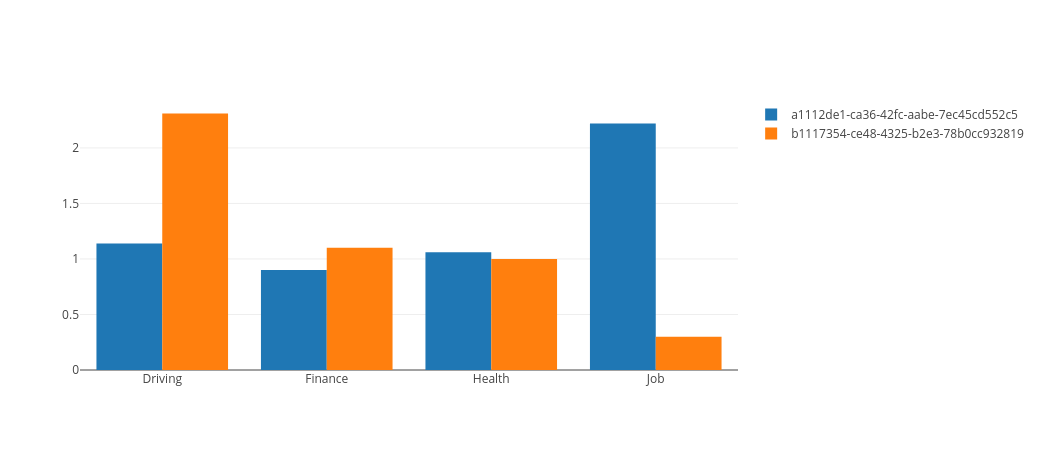

In [9]:
ds.plot_stress_bar()

## Compare stress data among user(s)

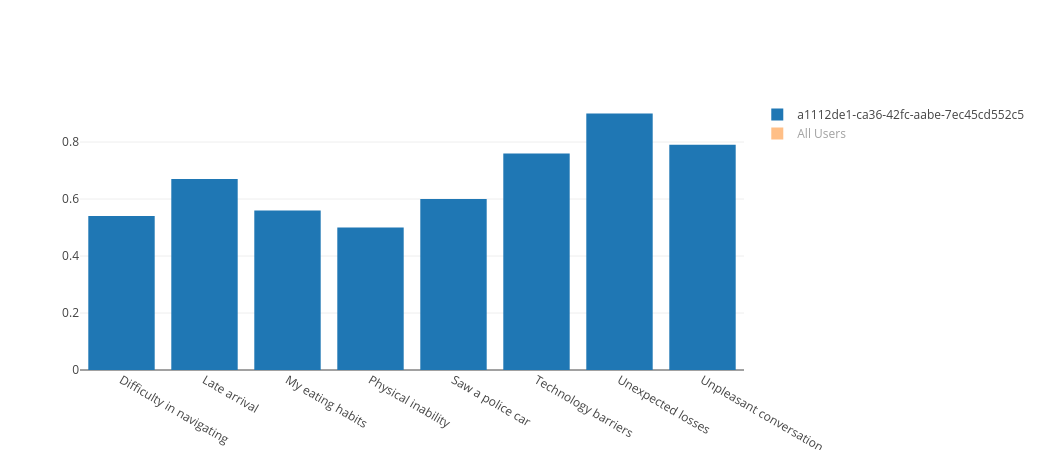

In [11]:
ds.plot_stress_comparison(x_axis_column="stresser_sub",usr_id="a1112de1-ca36-42fc-aabe-7ec45cd552c5")